### Content

This dataset is the most detailed information of trip information for BART and was provided by BART directly. Specifically, this data was pulled from the provided source http://64.111.127.166/origin-destination/. The data are automatically updated on the site and BART says they "are usually available by the 5th of the next month". This is done with the following notebook
https://www.kaggle.com/mrgeislinger/bart-hourly-ridership

<img src="BARTappmapSeptember2017.png" alt="BART Ridership">

##### We called the necessary libraries and models.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import base64

import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import mean_squared_error,r2_score

In [3]:
def regression(x, y):
    
    L = LinearRegression()
    E = ElasticNet()
    R = Ridge()
    Lass = Lasso()
    ETR = ExtraTreeRegressor()
    GBR = GradientBoostingRegressor()
    XGBC = XGBRegressor()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=13)
    
    algos = [L, E, R, Lass, ETR, GBR, XGBC]
    algo_names= ['Linear', 'ElasticNet', 'Ridge', 'Lasso', 'Extra Tree', 'Gradient Boosting', 'XGBRegressor']
    r_squared = []
    rmse = []
    mae = []
    
    result = pd.DataFrame(columns = ['R_Squared', 'RMSE', 'MAE'],
                           index = algo_names)
    
    for algo in algos:
        algo.fit(X_train, y_train)
        algo.predict(X_test)
        
        r_squared.append(r2_score(y_test, algo.predict(X_test)))
        rmse.append(mean_squared_error(y_test, algo.predict(X_test))**.5)
        mae.append(mean_absolute_error(y_test, algo.predict(X_test)))
        
    result.R_Squared = r_squared
    result.RMSE = rmse
    result.MAE = mae
    
    return result.sort_values('R_Squared', ascending=False)

##### We brought the data we have.

In [5]:
station=pd.read_csv('station_names.csv')
station

,Unnamed: 0,station_name_sort,Station Name
0,0,RM,Richmond
1,1,EN,El Cerrito Del Norte
2,2,EP,El Cerrito Plaza
3,3,NB,North Berkeley
4,4,BK,Berkeley
5,5,AS,Ashby
6,6,MA,MacArthur
7,7,19,19th Street Oakland
8,8,12,12th Street / Oakland City Center
9,9,LM,Lake Merritt


In [6]:
c=pd.read_csv("station_coords.csv").drop("Unnamed: 0",axis=1)

In [7]:
c

,station_name,latitute,longitude
0,12TH,798,702
1,19TH,798,655
2,MCAR,802,607
3,16TH,375,948
4,CIVC,397,915
5,POWL,419,886
6,MONT,438,860
7,EMBR,457,834
8,24TH,358,988
9,GLEN,339,1023


In [8]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 9CC6-B3DF

 Directory of C:\Users\18040\Yapay Zeka\Proje\BART Ridership

16.09.2022  22:32    <DIR>          .
16.09.2022  22:32    <DIR>          ..
16.09.2022  22:22    <DIR>          .ipynb_checkpoints
16.09.2022  22:30         2.217.586 BART Ridership.ipynb
16.09.2022  22:22         4.708.868 BART_app_map,_September_2017.png
16.09.2022  22:32       259.458.709 date-hour-soo-dest-2016.csv
16.09.2022  22:32       259.358.785 date-hour-soo-dest-2017.csv
16.09.2022  22:22               915 station_coords.csv
16.09.2022  22:22               996 station_names.csv
               6 File(s)    525.745.859 bytes
               3 Dir(s)  214.039.552.000 bytes free


In [9]:
df1=pd.read_csv("date-hour-soo-dest-2016.csv")

In [10]:
df2=pd.read_csv("date-hour-soo-dest-2017.csv")

##### We have merged our two data files

In [11]:
df=df1.append(df2) #Merges df1 and df2 as df

### EDA

In [12]:
df1.head()

,Date,Hour,Origin Station,Destination Station,Trip Count
0,2016-01-01,0,12TH,12TH,1
1,2016-01-01,0,12TH,16TH,1
2,2016-01-01,0,12TH,24TH,4
3,2016-01-01,0,12TH,ASHB,4
4,2016-01-01,0,12TH,BALB,2


In [13]:
df.head()

,Date,Hour,Origin Station,Destination Station,Trip Count
0,2016-01-01,0,12TH,12TH,1
1,2016-01-01,0,12TH,16TH,1
2,2016-01-01,0,12TH,24TH,4
3,2016-01-01,0,12TH,ASHB,4
4,2016-01-01,0,12TH,BALB,2


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19947757 entries, 0 to 9974094
Data columns (total 5 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   Date                 object
 1   Hour                 int64 
 2   Origin Station       object
 3   Destination Station  object
 4   Trip Count           int64 
dtypes: int64(2), object(3)
memory usage: 913.1+ MB


In [15]:
df.isnull().sum()

Date                   0
Hour                   0
Origin Station         0
Destination Station    0
Trip Count             0
dtype: int64

In [16]:
df.tail()

,Date,Hour,Origin Station,Destination Station,Trip Count
9974090,2018-01-01,2,WOAK,POWL,3
9974091,2018-01-01,2,WOAK,RICH,1
9974092,2018-01-01,2,WOAK,SBRN,1
9974093,2018-01-01,2,WOAK,SHAY,2
9974094,2018-01-01,2,WOAK,WOAK,2


In [17]:
df.sample(6)

,Date,Hour,Origin Station,Destination Station,Trip Count
7268377,2017-09-24,13,CAST,COLS,22
1345421,2017-02-21,7,12TH,SHAY,1
1896067,2016-03-10,14,SBRN,SSAN,2
2665716,2017-04-10,19,DALY,SFIA,4
4952216,2016-06-29,16,LAKE,RICH,8
3564978,2016-05-10,13,WCRK,PITT,5


##### We have organised the date column of our data and made it even clearer.

In [18]:
df['Date']=pd.to_datetime(df['Date'])

df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['Weekday']=df['Date'].dt.dayofweek
df['Month_Name']=df['Date'].dt.month_name()
df['Weekday_Name']=df['Date'].dt.day_name()

df=df.drop('Date',axis=1)
df.head()

,Hour,Origin Station,Destination Station,Trip Count,Year,Month,Weekday,Month_Name,Weekday_Name
0,0,12TH,12TH,1,2016,1,4,January,Friday
1,0,12TH,16TH,1,2016,1,4,January,Friday
2,0,12TH,24TH,4,2016,1,4,January,Friday
3,0,12TH,ASHB,4,2016,1,4,January,Friday
4,0,12TH,BALB,2,2016,1,4,January,Friday


## Q: Which BART station is the busiest?¶

### A1 if q is Rotation :Powl Street to Balboa Park

### A2 if q is Origin: Powl, Destination:Powl

In [19]:
df3 = pd.DataFrame()

In [20]:
df['StationBusiest']=df['Origin Station'] + df['Destination Station']

In [21]:
df3['Total Trip'] = df.groupby('StationBusiest')['Trip Count'].sum().sort_values(ascending=False)

In [22]:
df3['Total Trip']

StationBusiest
POWLBALB    1609859
BALBMONT    1491013
BALBPOWL    1370588
DUBLEMBR    1351861
POWL24TH    1336889
             ...   
COLMWARM        463
WARMSBRN        366
WARMCOLM        319
MLBRWARM        302
WARMMLBR        268
Name: Total Trip, Length: 2116, dtype: int64

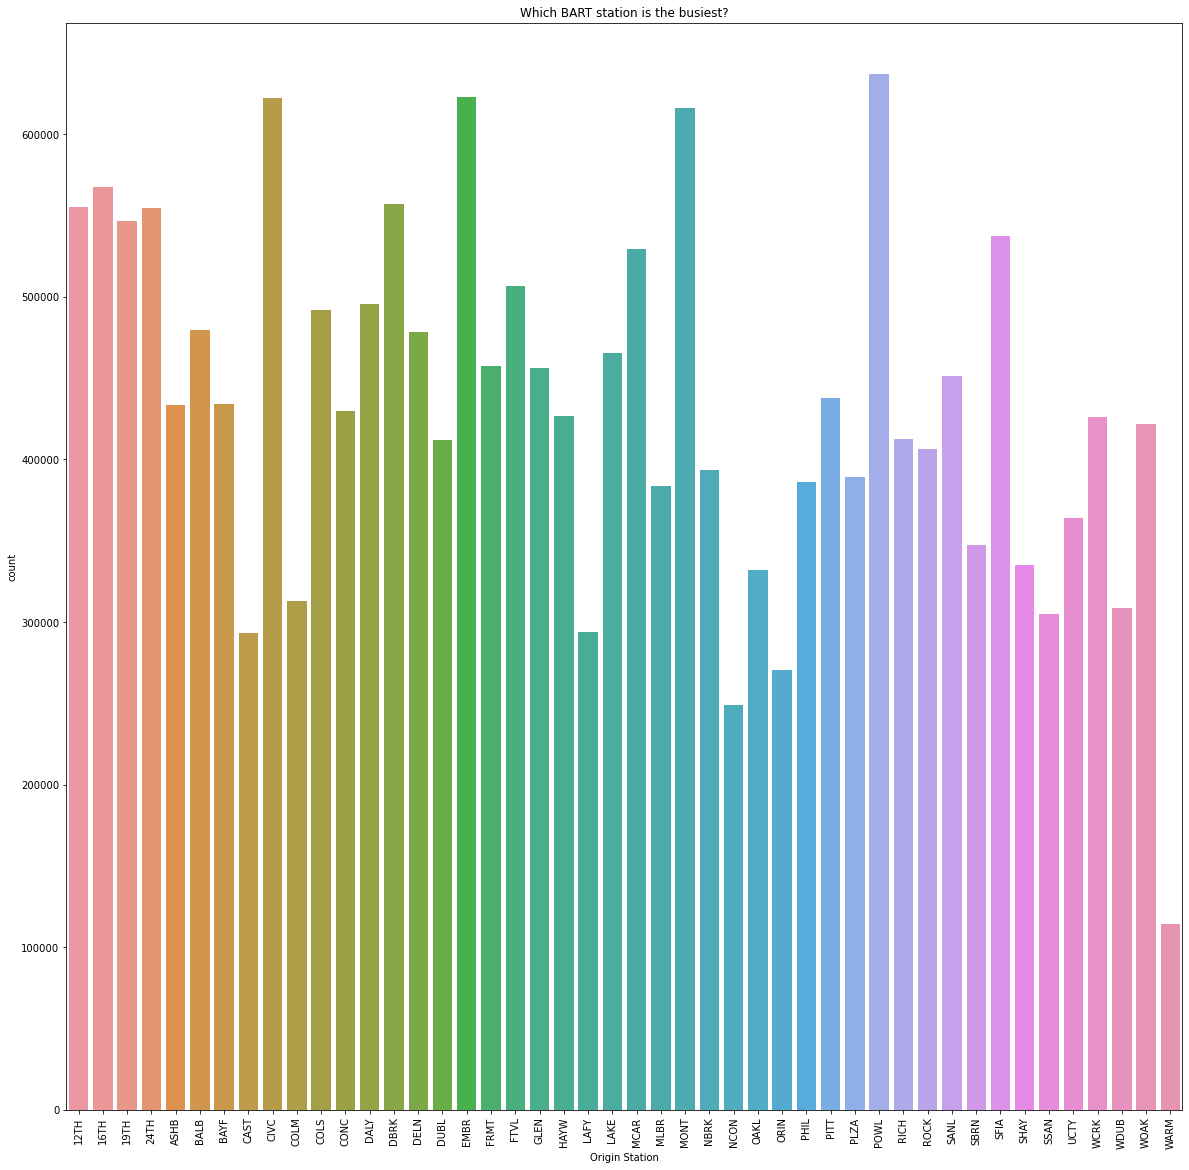

In [23]:
fig=plt.figure(figsize=(20,20))
ax=sns.countplot(df['Origin Station'],)
ax.set_title('Which BART station is the busiest?')
ax.set_xlabel('Origin Station')
plt.xticks(rotation=90);

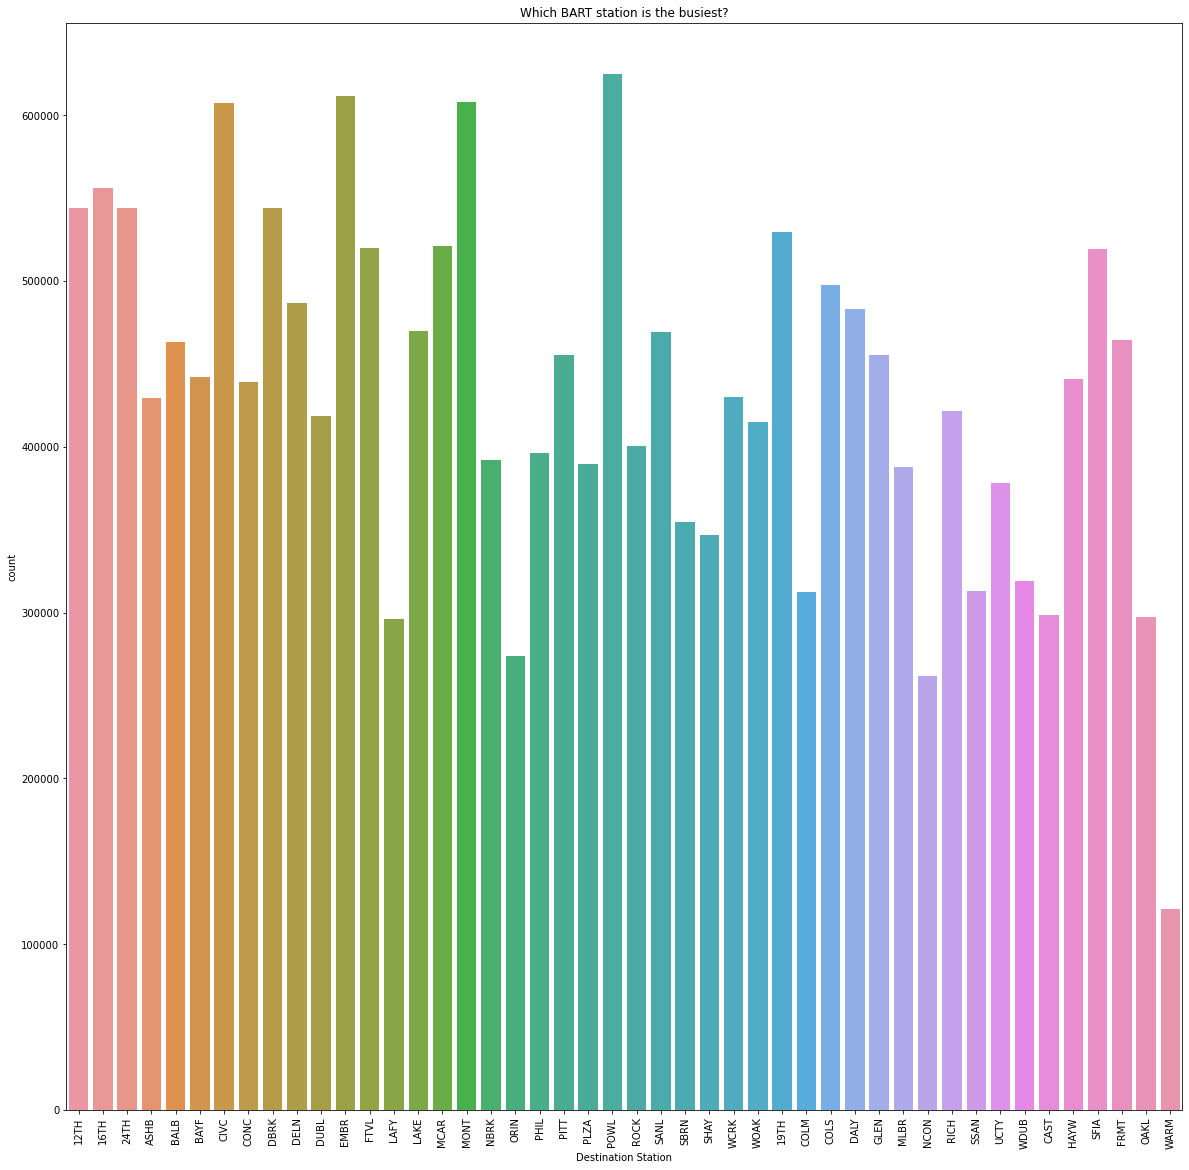

In [24]:
fig=plt.figure(figsize=(20,20))
ax=sns.countplot(df['Destination Station'],)
ax.set_title('Which BART station is the busiest?')
ax.set_xlabel('Destination Station')
plt.xticks(rotation=90);

## Ø What is the least popular BART route?

### WARMMLBR :Warm Springs to Millbrae

In [25]:
df3['Total Trip']

StationBusiest
POWLBALB    1609859
BALBMONT    1491013
BALBPOWL    1370588
DUBLEMBR    1351861
POWL24TH    1336889
             ...   
COLMWARM        463
WARMSBRN        366
WARMCOLM        319
MLBRWARM        302
WARMMLBR        268
Name: Total Trip, Length: 2116, dtype: int64

## Ø When is the best time to go to SF from Berkeley if you want to find a seat?

### Sunday 03.00 AM is the best time to go to SF from Berkeley

In [26]:
# There are 2 Berkeley Station:DBRK and NBRK

In [27]:
df['Origin Station'].unique()

array(['12TH', '16TH', '19TH', '24TH', 'ASHB', 'BALB', 'BAYF', 'CAST',
       'CIVC', 'COLM', 'COLS', 'CONC', 'DALY', 'DBRK', 'DELN', 'DUBL',
       'EMBR', 'FRMT', 'FTVL', 'GLEN', 'HAYW', 'LAFY', 'LAKE', 'MCAR',
       'MLBR', 'MONT', 'NBRK', 'NCON', 'OAKL', 'ORIN', 'PHIL', 'PITT',
       'PLZA', 'POWL', 'RICH', 'ROCK', 'SANL', 'SBRN', 'SFIA', 'SHAY',
       'SSAN', 'UCTY', 'WCRK', 'WDUB', 'WOAK', 'WARM'], dtype=object)

In [28]:
df['Destination Station'].unique()

array(['12TH', '16TH', '24TH', 'ASHB', 'BALB', 'BAYF', 'CIVC', 'CONC',
       'DBRK', 'DELN', 'DUBL', 'EMBR', 'FTVL', 'LAFY', 'LAKE', 'MCAR',
       'MONT', 'NBRK', 'ORIN', 'PHIL', 'PITT', 'PLZA', 'POWL', 'ROCK',
       'SANL', 'SBRN', 'SHAY', 'WCRK', 'WOAK', '19TH', 'COLM', 'COLS',
       'DALY', 'GLEN', 'MLBR', 'NCON', 'RICH', 'SSAN', 'UCTY', 'WDUB',
       'CAST', 'HAYW', 'SFIA', 'FRMT', 'OAKL', 'WARM'], dtype=object)

In [29]:
berkley_to_sf=df[(df['Origin Station']=='DBRK') & (df['Destination Station']=='SSAN')]

In [30]:
berkley_to_sf.groupby('Weekday').count()['Trip Count'].sort_values(ascending=False)

Weekday
4    1440
3    1438
2    1426
1    1392
0    1249
5     945
6     717
Name: Trip Count, dtype: int64

In [31]:
berkley_to_sf.groupby('Hour').count()['Trip Count'].sort_values(ascending=False)

Hour
17    652
18    643
16    615
19    566
9     523
22    518
8     505
15    493
20    468
21    454
7     400
14    399
13    389
23    348
10    344
11    327
12    310
0     240
6     190
5     148
1      72
2       2
3       1
Name: Trip Count, dtype: int64

<AxesSubplot:xlabel='Weekday', ylabel='count'>

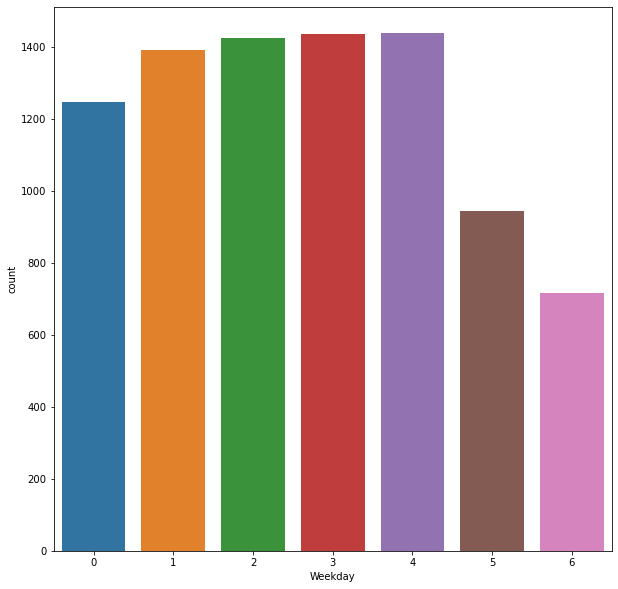

In [32]:
plt.figure(figsize=(10,10))
sns.countplot(berkley_to_sf['Weekday'])

<AxesSubplot:xlabel='Hour', ylabel='count'>

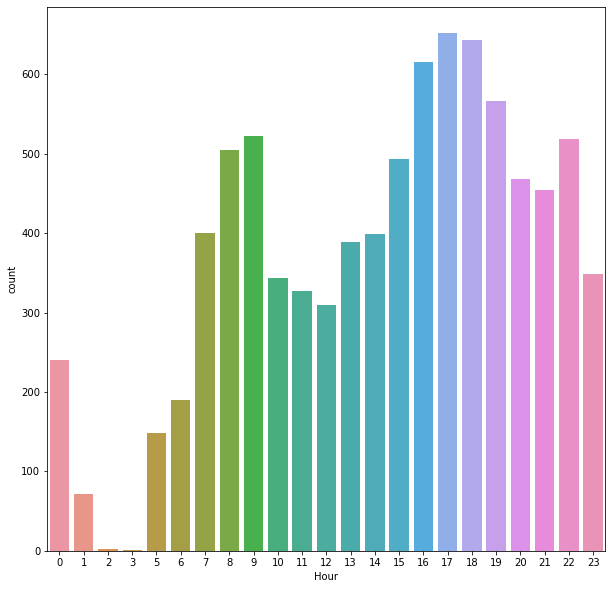

In [33]:
plt.figure(figsize=(10,10))
sns.countplot(berkley_to_sf['Hour'])

<AxesSubplot:xlabel='Weekday', ylabel='count'>

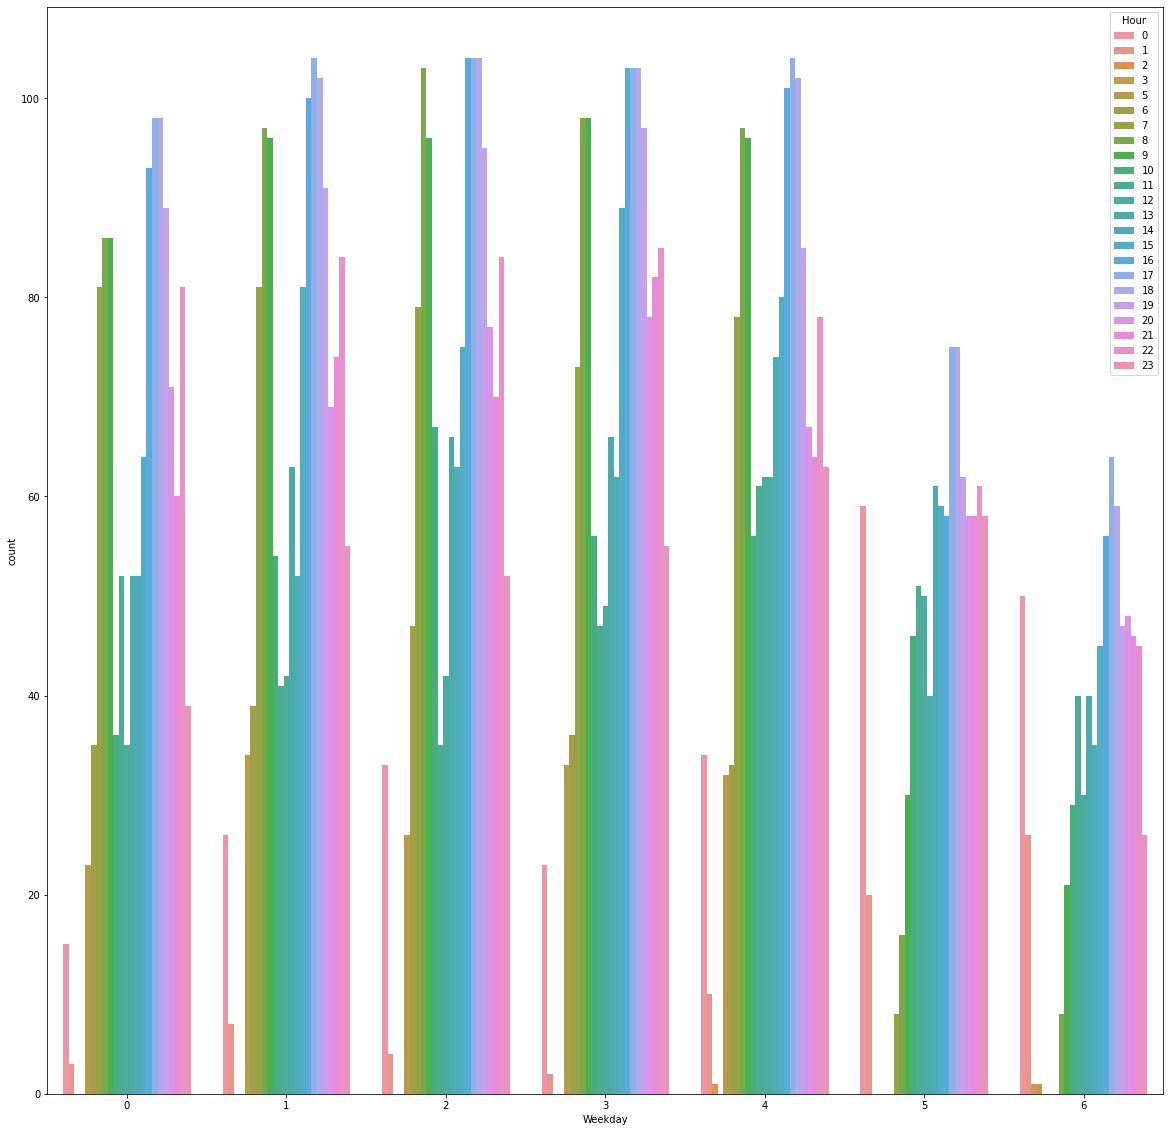

In [34]:
plt.figure(figsize=(20,20))
sns.countplot(berkley_to_sf['Weekday'],hue=berkley_to_sf['Hour'])

## Ø Which day of the week is the busiest?

### Friday

<AxesSubplot:xlabel='Weekday', ylabel='count'>

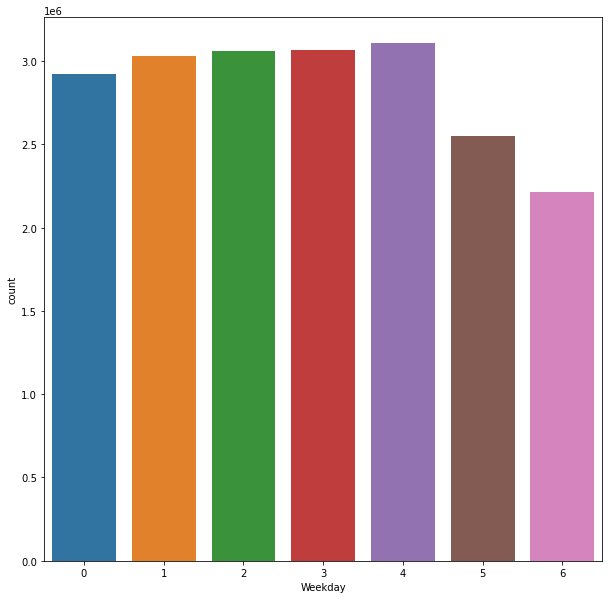

In [35]:
plt.figure(figsize=(10,10))
sns.countplot(df['Weekday'])

## Ø How many people take the BART late at night?

### 3582552

In [36]:
df[(df['Hour']>0) & (df['Hour']<6)]['Trip Count'].sum()

3582552

## Ø Question A: Compute the straight line distance between every station

In [37]:
stationsA=c[["station_name","latitute","longitude"]]
stationsB=c[["station_name","latitute","longitude"]]

In [38]:
stationsA[["longitude","latitude"]]=stationsA[["longitude","latitute"]].astype("float")
stationsB[["longitude","latitude"]]=stationsB[["longitude","latitute"]].astype("float")

In [39]:
stationsA[['lat_radians_A','long_radians_A']] = np.radians(stationsA[['latitute','longitude']])
stationsB[['lat_radians_B','long_radians_B']] = np.radians(stationsB[['latitute','longitude']])

In [40]:
import sklearn
from sklearn import neighbors

dist = sklearn.neighbors.DistanceMetric.get_metric('haversine')

dist_matrix = (dist.pairwise
    (stationsA[['lat_radians_A','long_radians_A']],stationsB[['lat_radians_B','long_radians_B']])*6371)

# Note that 6371 is the radius of the earth in kilometers

df_dist_matrix = (
    pd.DataFrame(dist_matrix,index=stationsA['station_name'], 
                 columns=stationsB['station_name'])
)

In [41]:
df_dist_matrix

station_name,12TH,19TH,MCAR,16TH,CIVC,POWL,MONT,EMBR,24TH,GLEN,...,CAST,WDUB,DUBL,OAKL,ASHB,DBRK,NBRK,PLZA,DELN,RICH
station_name,,,,,,,,,,,,,,,,,,,,,
12TH,0.000000,1057.584186,1663.472619,8909.621742,7038.016162,4778.944596,2618.937892,995.741980,9860.127863,11288.385173,...,11155.957608,2007.513335,15108.539289,9561.014410,6299.982047,9502.164627,11941.896665,14561.366701,17145.809090,18813.276291
19TH,1057.584186,0.000000,988.388694,7853.930801,6222.015617,4397.981758,2604.512517,556.256659,9041.822315,11020.484362,...,10099.364087,3064.862879,14262.358698,9105.276044,5725.558167,9617.961499,12765.303827,15591.577920,17527.017874,19124.229234
MCAR,1663.472619,988.388694,0.000000,7500.666094,5377.898240,3411.359073,1804.217720,671.289604,9399.526513,11830.365496,...,9738.349267,3488.740903,13450.385679,8122.545384,4757.701582,8728.025766,12380.238332,16060.129375,18498.869833,18137.509047
16TH,8909.621742,7853.930801,7500.666094,0.000000,4070.661742,6995.140922,8330.694084,8034.467182,4789.736736,9108.528448,...,2248.334567,10910.124618,7174.099956,6723.996970,5804.863217,10202.138170,15499.036586,16455.643072,12594.587316,11871.977078
CIVC,7038.016162,6222.015617,5377.898240,4070.661742,0.000000,3211.595762,5209.542583,6049.156203,8644.261551,12953.308665,...,5611.405294,8639.787371,8072.502140,3761.319771,1747.244659,6627.616593,12259.494088,17171.622255,15572.994901,13046.697363
POWL,4778.944596,4397.981758,3411.359073,6995.140922,3211.595762,0.000000,2315.445231,3969.100529,10882.686156,14590.029670,...,8792.583940,5846.250524,10599.252254,4782.086203,1724.137912,5630.111294,10559.130518,15885.536470,18083.951955,14726.603225
MONT,2618.937892,2604.512517,1804.217720,8330.694084,5209.542583,2315.445231,0.000000,2061.933911,11044.614919,13612.756136,...,10435.993892,3542.331535,12914.520466,7028.454891,4002.477343,7019.247480,10690.304653,15154.261603,19103.666296,16580.785987
EMBR,995.741980,556.256659,671.289604,8034.467182,6049.156203,3969.100529,2061.933911,0.000000,9530.359554,11573.471456,...,10281.569562,2893.110991,14121.654967,8725.609148,5392.157699,9080.901564,12273.015743,15491.832435,17976.093504,18634.440654
24TH,9860.127863,9041.822315,9399.526513,4789.736736,8644.261551,10882.686156,11044.614919,9530.359554,0.000000,4340.251902,...,4783.111256,11442.790428,9242.548334,11458.136530,10243.393504,14978.347170,18222.364927,13261.835489,9737.965574,11347.660988


In [42]:
df_dist_long = (
    pd.melt(df_dist_matrix.reset_index(),id_vars='station_name')
)
df_dist_long = df_dist_long.rename(columns={'value':'km'})

In [43]:
df_dist_long

,station_name,station_name,km
0,12TH,12TH,0.000000
1,12TH,12TH,1057.584186
2,12TH,12TH,1663.472619
3,12TH,12TH,8909.621742
4,12TH,12TH,7038.016162
...,...,...,...
2495,RICH,RICH,9563.987153
2496,RICH,RICH,6884.979341
2497,RICH,RICH,4899.651141
2498,RICH,RICH,3377.728342


## Ø Question B: Build a model that can predicted the number of people commuting to work by Bart between any 2 stations:

##### (internet search) How many hours does the USA work daily? Working hours in factories are between 8 am and 4:30 pm and in offices it is between 8:30 am and 5 pm.

#### I choose intervel of 08:00-17:00

In [44]:
df

,Hour,Origin Station,Destination Station,Trip Count,Year,Month,Weekday,Month_Name,Weekday_Name,StationBusiest
0,0,12TH,12TH,1,2016,1,4,January,Friday,12TH12TH
1,0,12TH,16TH,1,2016,1,4,January,Friday,12TH16TH
2,0,12TH,24TH,4,2016,1,4,January,Friday,12TH24TH
3,0,12TH,ASHB,4,2016,1,4,January,Friday,12THASHB
4,0,12TH,BALB,2,2016,1,4,January,Friday,12THBALB
...,...,...,...,...,...,...,...,...,...,...
9974090,2,WOAK,POWL,3,2018,1,0,January,Monday,WOAKPOWL
9974091,2,WOAK,RICH,1,2018,1,0,January,Monday,WOAKRICH
9974092,2,WOAK,SBRN,1,2018,1,0,January,Monday,WOAKSBRN
9974093,2,WOAK,SHAY,2,2018,1,0,January,Monday,WOAKSHAY


In [45]:
morning=df[(df['Hour']==8)]
evening=df[(df['Hour']==17)]

In [46]:
morning.groupby(['Year','Month','Weekday'])['Trip Count'].mean()

Year  Month  Weekday
2016  1      0          26.011952
             1          29.942582
             2          30.425972
             3          30.470191
             4          25.359039
                          ...    
2017  12     2          25.576254
             3          24.773234
             4          21.769916
             5           5.114989
             6           4.421232
Name: Trip Count, Length: 168, dtype: float64

In [47]:
evening.groupby(['Year','Month','Weekday'])['Trip Count'].mean()

Year  Month  Weekday
2016  1      0          24.497091
             1          28.336341
             2          28.850494
             3          28.502969
             4          23.539801
                          ...    
2017  12     2          25.445646
             3          24.754231
             4          21.793339
             5          10.407049
             6           8.607519
Name: Trip Count, Length: 168, dtype: float64

In [48]:
count1=(evening.groupby(['Year','Month','Weekday'])['Trip Count'].mean()+morning.groupby(['Year','Month','Weekday'])['Trip Count'].mean())/2

In [49]:
count1=count1.dropna()

In [50]:
count1

Year  Month  Weekday
2016  1      0          25.254521
             1          29.139462
             2          29.638233
             3          29.486580
             4          24.449420
                          ...    
2017  12     2          25.510950
             3          24.763733
             4          21.781627
             5           7.761019
             6           6.514376
Name: Trip Count, Length: 168, dtype: float64